In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [3]:
dat = pd.read_csv('./healthcare-dataset-stroke-data.csv', index_col=0)

In [4]:
dat

gender   age  hypertension  heart_disease ever_married      work_type  \
id                                                                             
9046     Male  67.0             0              1          Yes        Private   
51676  Female  61.0             0              0          Yes  Self-employed   
31112    Male  80.0             0              1          Yes        Private   
60182  Female  49.0             0              0          Yes        Private   
1665   Female  79.0             1              0          Yes  Self-employed   
...       ...   ...           ...            ...          ...            ...   
18234  Female  80.0             1              0          Yes        Private   
44873  Female  81.0             0              0          Yes  Self-employed   
19723  Female  35.0             0              0          Yes  Self-employed   
37544    Male  51.0             0              0          Yes        Private   
44679  Female  44.0             0              0          Yes       Govt_job   

      Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
id                                                                      
9046           Urban             228.69  36.6  formerly smoked       1  
51676          Rural             202.21   NaN     never smoked       1  
31112          Rural             105.92  32.5     never smoked       1  
60182          Urban             171.23  34.4           smokes       1  
1665           Rural             174.12  24.0     never smoked       1  
...              ...                ...   ...              ...     ...  
18234          Urban              83.75   NaN     never smoked       0  
44873          Urban             125.20  40.0     never smoked       0  
19723          Rural              82.99  30.6     never smoked       0  
37544          Rural             166.29  25.6  formerly smoked       0  
44679          Urban              85.28  26.2          Unknown       0  

[5110 rows x 11 columns]

In [5]:
df = dat.dropna()

In [5]:
df.shape

(4909, 11)

In [6]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

### nan 값 지운 데이터 파악

#### Gender

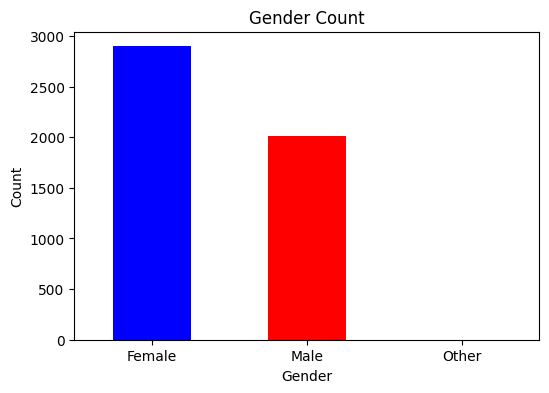

In [20]:
gender = df['gender']
gender_df = pd.DataFrame(gender)
gender_count = df['gender'].value_counts()

plt.figure(figsize=(6, 4))
gender_count.plot(kind='bar', color=['blue', 'red'])
plt.title('Gender Count')  
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

#### age

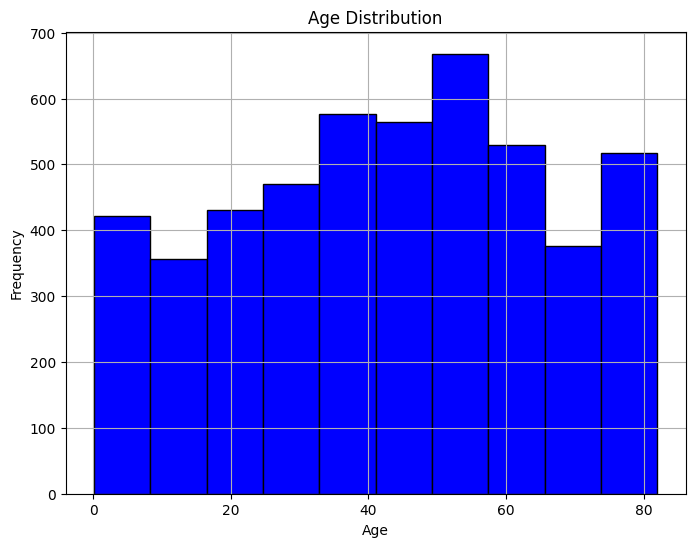

In [32]:
age = df['age']
age_df = pd.DataFrame(age)

plt.figure(figsize=(8, 6))
plt.hist(df['age'], bins=10, color='blue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

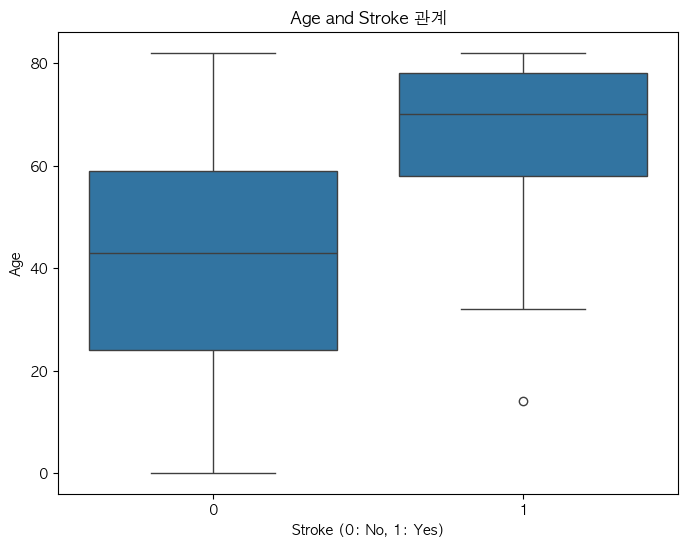

In [39]:
# Age and Stroke 관계
plt.rc('font', family='AppleGothic') 
plt.figure(figsize=(8, 6))
sns.boxplot(x='stroke', y='age', data=df)
plt.title('Age and Stroke 관계')
plt.xlabel('Stroke (0: No, 1: Yes)')
plt.ylabel('Age')
plt.show()


/var/folders/68/bfrdrq513456x7ygy_s1ggc00000gn/T/ipykernel_63844/2144230385.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_bins'] = pd.cut(df['age'], bins=10)


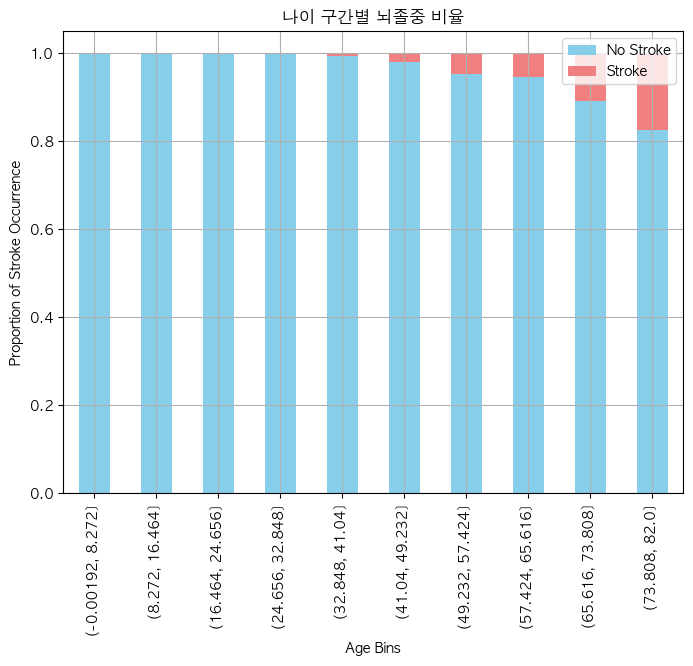

In [51]:
# 나이대 별 뇌졸중 예측
# 나이를 10개의 구간(bins)으로 나누기
df['age_bins'] = pd.cut(df['age'], bins=10)

# 나이 구간별 뇌졸중 비율 계산
age_stroke = pd.crosstab(df['age_bins'], df['stroke'], normalize='index')

# 스택형 막대 그래프 그리기
age_stroke.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'], figsize=(8, 6))
plt.title('나이 구간별 뇌졸중 비율')
plt.xlabel('Age Bins')
plt.ylabel('Proportion of Stroke Occurrence')
plt.legend(['No Stroke', 'Stroke'])
plt.grid(True)
plt.show()


#### hypertension

In [43]:
# hypertension
hypertension = df['hypertension']
hypertension_df = pd.DataFrame(hypertension)
hypertension_count = hypertension_df.value_counts()
hypertension_count

hypertension
0               4458
1                451
Name: count, dtype: int64

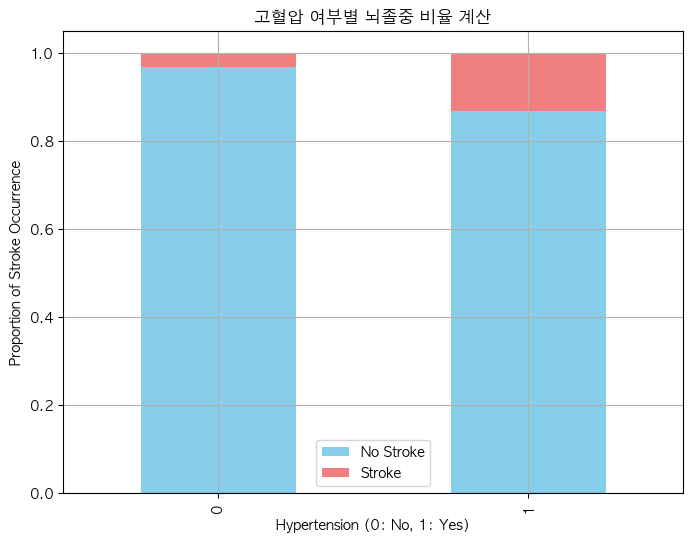

In [52]:
# 고혈압 여부별 뇌졸중 비율 계산
hypertension_stroke = pd.crosstab(df['hypertension'], df['stroke'], normalize='index')

# 스택형 막대 그래프 그리기
hypertension_stroke.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'], figsize=(8, 6))
plt.title('고혈압 여부별 뇌졸중 비율 계산')
plt.xlabel('Hypertension (0: No, 1: Yes)')
plt.ylabel('Proportion of Stroke Occurrence')
plt.legend(['No Stroke', 'Stroke'])
plt.grid(True)
plt.show()

#### heart_disease

In [42]:
# heart_disease
heart_disease = df['heart_disease']
heart_disease_df = pd.DataFrame(heart_disease)
heart_disease_count = heart_disease_df.value_counts()
heart_disease_count

heart_disease
0                4666
1                 243
Name: count, dtype: int64

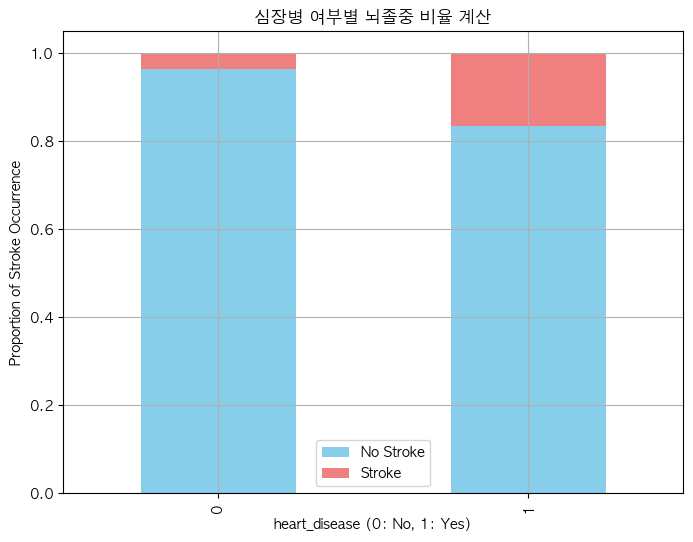

In [55]:
# 심장병 여부별 뇌졸중 비율 계산
heart_disease_stroke = pd.crosstab(df['heart_disease'], df['stroke'], normalize='index')

# 스택형 막대 그래프 그리기
heart_disease_stroke.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'], figsize=(8, 6))
plt.title('심장병 여부별 뇌졸중 비율 계산')
plt.xlabel('heart_disease (0: No, 1: Yes)')
plt.ylabel('Proportion of Stroke Occurrence')
plt.legend(['No Stroke', 'Stroke'])
plt.grid(True)
plt.show()

#### ever_married

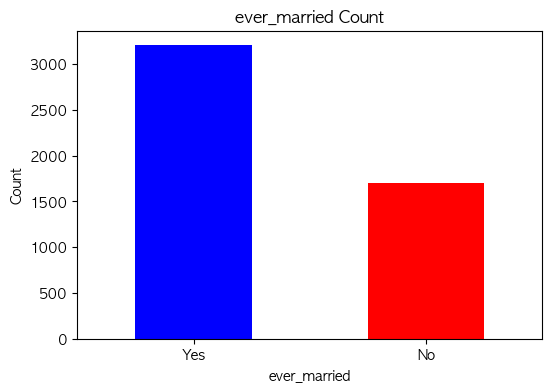

In [54]:
ever_married = df['ever_married']
ever_married_df = pd.DataFrame(ever_married)
ever_married_count = df['ever_married'].value_counts()

plt.figure(figsize=(6, 4))
ever_married_count.plot(kind='bar', color=['blue', 'red'])
plt.title('ever_married Count')  
plt.xlabel('ever_married')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

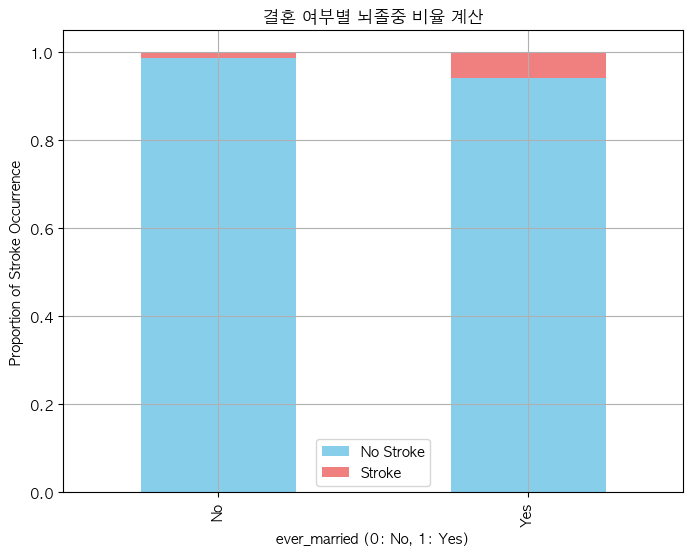

In [56]:
# 결혼 여부별 뇌졸중 비율 계산
ever_married_stroke = pd.crosstab(df['ever_married'], df['stroke'], normalize='index')

# 스택형 막대 그래프 그리기
ever_married_stroke.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'], figsize=(8, 6))
plt.title('결혼 여부별 뇌졸중 비율 계산')
plt.xlabel('ever_married (0: No, 1: Yes)')
plt.ylabel('Proportion of Stroke Occurrence')
plt.legend(['No Stroke', 'Stroke'])
plt.grid(True)
plt.show()

#### work_type

In [59]:
work_type = df['work_type']
work_type_df = pd.DataFrame(work_type)
work_type_df_count = work_type_df.value_counts()
work_type_df_count
# private: 사기업
# self-employed: 자영업
# children: 아동
# govt_job: 공무원
# never_worked

work_type    
Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: count, dtype: int64

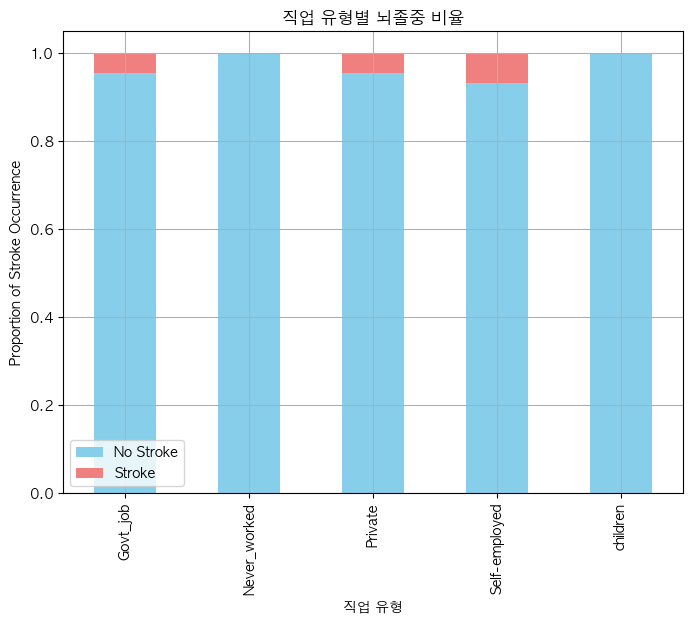

In [60]:
# work_type 별 뇌졸중 비율 계산
work_type_stroke = pd.crosstab(df['work_type'], df['stroke'], normalize='index')

# 스택형 막대 그래프 그리기
work_type_stroke.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'], figsize=(8, 6))
plt.title('직업 유형별 뇌졸중 비율')
plt.xlabel('직업 유형')
plt.ylabel('Proportion of Stroke Occurrence')
plt.legend(['No Stroke', 'Stroke'])
plt.grid(True)
plt.show()

#### Residence_type

In [61]:
Residence_type = df['Residence_type']
Residence_type_df = pd.DataFrame(Residence_type)
Residence_type_df_count = Residence_type_df.value_counts()
Residence_type_df_count

Residence_type
Urban             2490
Rural             2419
Name: count, dtype: int64

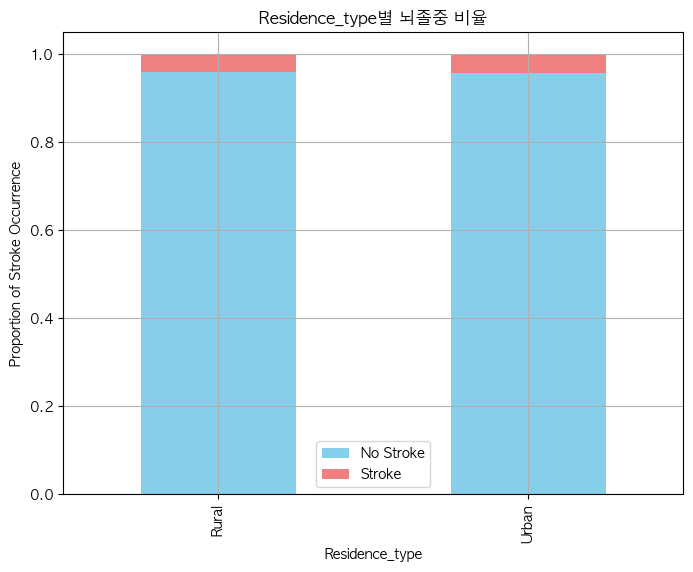

In [62]:
# Residence_type 별 뇌졸중 비율 계산
Residence_type_stroke = pd.crosstab(df['Residence_type'], df['stroke'], normalize='index')

# 스택형 막대 그래프 그리기
Residence_type_stroke.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'], figsize=(8, 6))
plt.title('Residence_type별 뇌졸중 비율')
plt.xlabel('Residence_type')
plt.ylabel('Proportion of Stroke Occurrence')
plt.legend(['No Stroke', 'Stroke'])
plt.grid(True)
plt.show()

#### avg_glucose_level: 혈당 수치
정상 범위는 일반적으로 공복 시 70~100 mg/dL 사이

In [63]:
avg_glucose_level = df['avg_glucose_level']
avg_glucose_level_df = pd.DataFrame(avg_glucose_level)
avg_glucose_level_df_count = avg_glucose_level_df.value_counts()
avg_glucose_level_df_count

avg_glucose_level
93.88                6
91.85                5
83.16                5
72.49                5
91.68                5
                    ..
87.12                1
87.17                1
87.18                1
87.20                1
271.74               1
Name: count, Length: 3852, dtype: int64

/var/folders/68/bfrdrq513456x7ygy_s1ggc00000gn/T/ipykernel_63844/3893228379.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['glucose_level_bins'] = pd.cut(df['avg_glucose_level'], bins=bins, labels=labels, right=False)


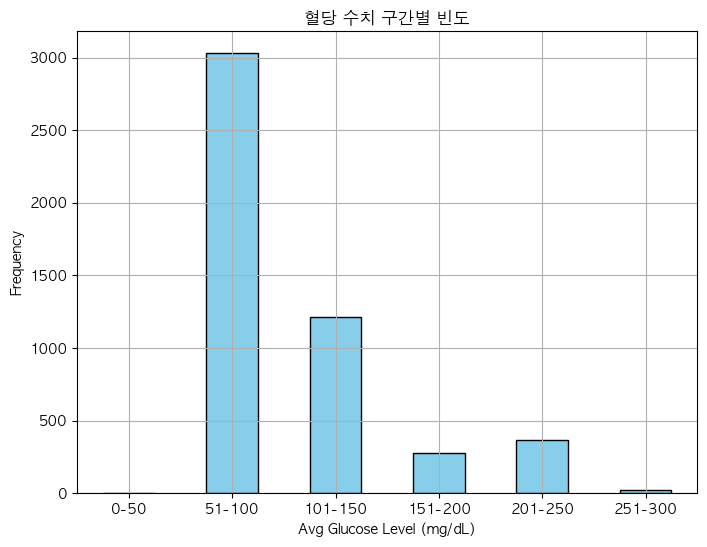

In [65]:
# avg_glucose_level을 10대, 20대, ..., 90대로 구간 나누기
bins = [0, 50, 100, 150, 200, 250, 300]  # 0-100, 101-200, 201-300 등으로 나눔
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300']
df['glucose_level_bins'] = pd.cut(df['avg_glucose_level'], bins=bins, labels=labels, right=False)

# 각 구간별 빈도 계산
glucose_level_counts = df['glucose_level_bins'].value_counts().sort_index()

# 막대 그래프 그리기
plt.figure(figsize=(8, 6))
glucose_level_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('혈당 수치 구간별 빈도')
plt.xlabel('Avg Glucose Level (mg/dL)')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

/var/folders/68/bfrdrq513456x7ygy_s1ggc00000gn/T/ipykernel_63844/970333944.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['glucose_level_bins'] = pd.cut(df['avg_glucose_level'], bins=bins, labels=labels, right=False)


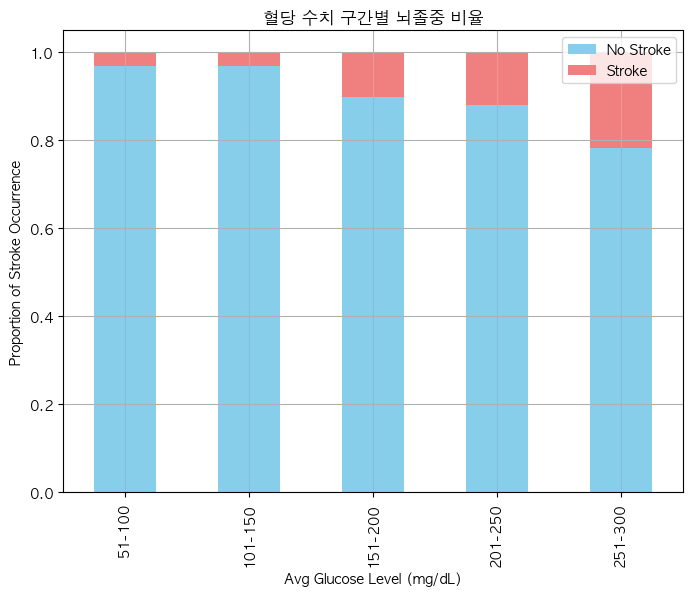

In [66]:
# avg_glucose_level을 10대, 20대, ..., 90대로 구간 나누기
bins = [0, 50, 100, 150, 200, 250, 300]  # 0-50, 51-100, ..., 251-300으로 나눔
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300']
df['glucose_level_bins'] = pd.cut(df['avg_glucose_level'], bins=bins, labels=labels, right=False)

# 구간별 뇌졸중 비율 계산 (crosstab 사용)
glucose_stroke_crosstab = pd.crosstab(df['glucose_level_bins'], df['stroke'], normalize='index')

# 스택형 막대 그래프 그리기
glucose_stroke_crosstab.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'], figsize=(8, 6))
plt.title('혈당 수치 구간별 뇌졸중 비율')
plt.xlabel('Avg Glucose Level (mg/dL)')
plt.ylabel('Proportion of Stroke Occurrence')
plt.legend(['No Stroke', 'Stroke'])
plt.grid(True)
plt.show()

#### bmi

In [76]:
bmi = df['bmi']
bmi_df = pd.DataFrame(bmi)
bmi_df_count = bmi_df.value_counts()
bmi_df_count.max()
'''
저체중: BMI < 18.5
정상체중: 18.5 ≤ BMI < 25
과체중: 25 ≤ BMI < 30
비만: 30 ≤ BMI < 35
고도비만: BMI ≥ 35
'''

'\n저체중: BMI < 18.5\n정상체중: 18.5 ≤ BMI < 25\n과체중: 25 ≤ BMI < 30\n비만: 30 ≤ BMI < 35\n고도비만: BMI ≥ 35\n'

/var/folders/68/bfrdrq513456x7ygy_s1ggc00000gn/T/ipykernel_63844/3621556720.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bmi_level_bins'] = pd.cut(df['bmi'], bins=bins, labels=labels, right=False)


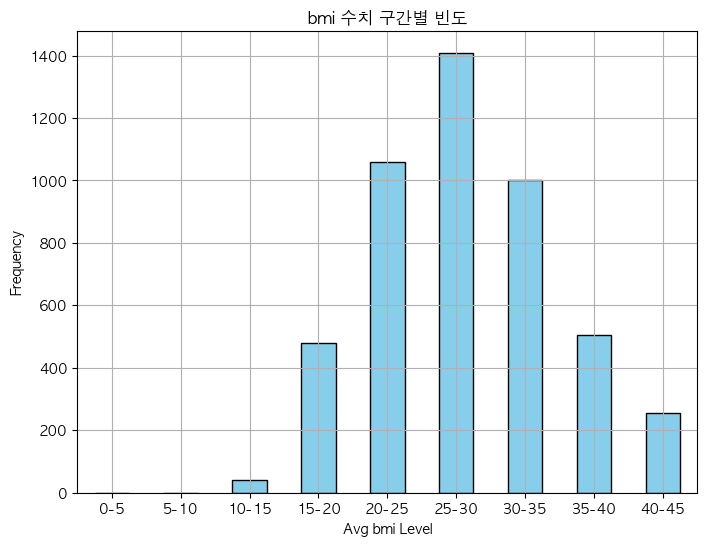

In [72]:
# bmi 
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]  # 0-100, 101-200, 201-300 등으로 나눔
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45']   
df['bmi_level_bins'] = pd.cut(df['bmi'], bins=bins, labels=labels, right=False)

# 각 구간별 빈도 계산
bmi_level_counts = df['bmi_level_bins'].value_counts().sort_index()

# 막대 그래프 그리기
plt.figure(figsize=(8, 6))
bmi_level_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('bmi 수치 구간별 빈도')
plt.xlabel('Avg bmi Level')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

/var/folders/68/bfrdrq513456x7ygy_s1ggc00000gn/T/ipykernel_63844/3190008686.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bmi_bins'] = pd.cut(df['bmi'], bins=bins, labels=labels, right=False)


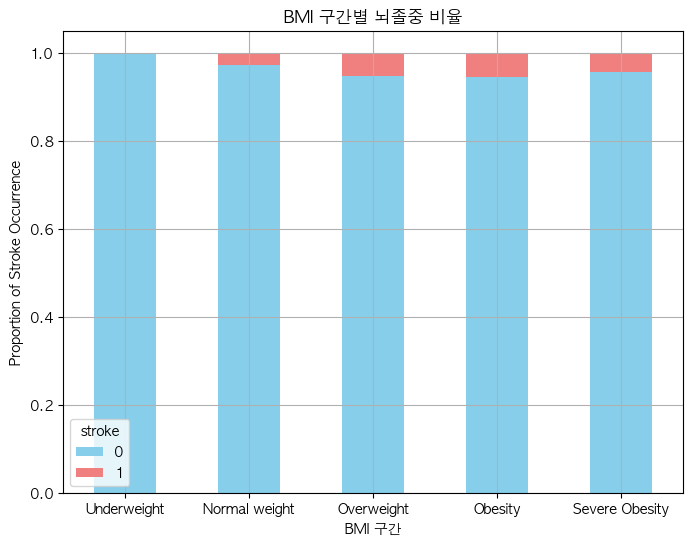

In [78]:

# bmi 구간을 적당히 나누기 (저체중, 정상체중, 과체중, 비만, 고도비만)
bins = [0, 18.5, 25, 30, 35, 45]  # BMI 기준 구간
labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity', 'Severe Obesity']  # 구간에 맞는 레이블

# BMI 구간에 따라 분류
df['bmi_bins'] = pd.cut(df['bmi'], bins=bins, labels=labels, right=False)

# 각 구간별 빈도 계산
bmi_counts = df['bmi_bins'].value_counts().sort_index()

# 구간별 뇌졸중 비율 계산 (crosstab 사용)
bmi_bins_crosstab = pd.crosstab(df['bmi_bins'], df['stroke'], normalize='index')

# 스택형 막대 그래프 그리기
bmi_bins_crosstab.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'], figsize=(8, 6))
plt.title('BMI 구간별 뇌졸중 비율')
plt.xlabel('BMI 구간')
plt.ylabel('Proportion of Stroke Occurrence')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

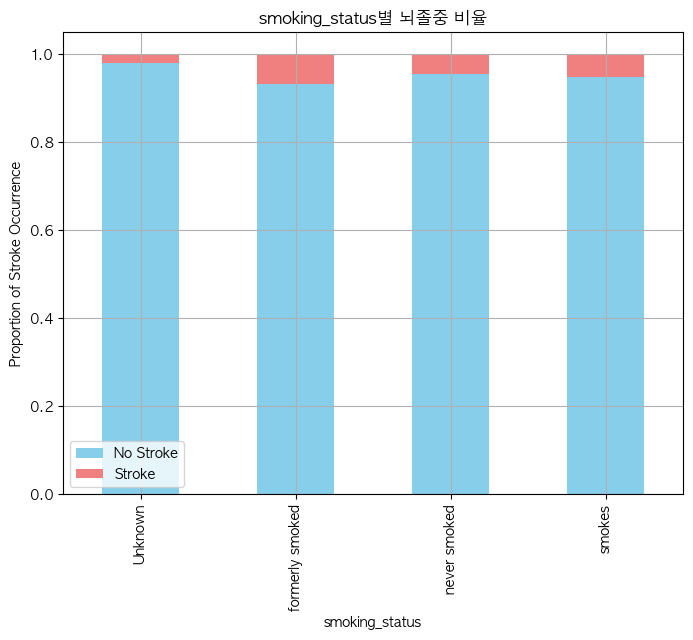

In [7]:
# smoking_status 별 뇌졸중 비율 계산
plt.rc('font', family='AppleGothic') 
smoking_status_stroke = pd.crosstab(df['smoking_status'], df['stroke'], normalize='index')

# 스택형 막대 그래프 그리기
smoking_status_stroke.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'], figsize=(8, 6))
plt.title('smoking_status별 뇌졸중 비율')
plt.xlabel('smoking_status')
plt.ylabel('Proportion of Stroke Occurrence')
plt.legend(['No Stroke', 'Stroke'])
plt.grid(True)
plt.show()

/Users/sookyoungsohn/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


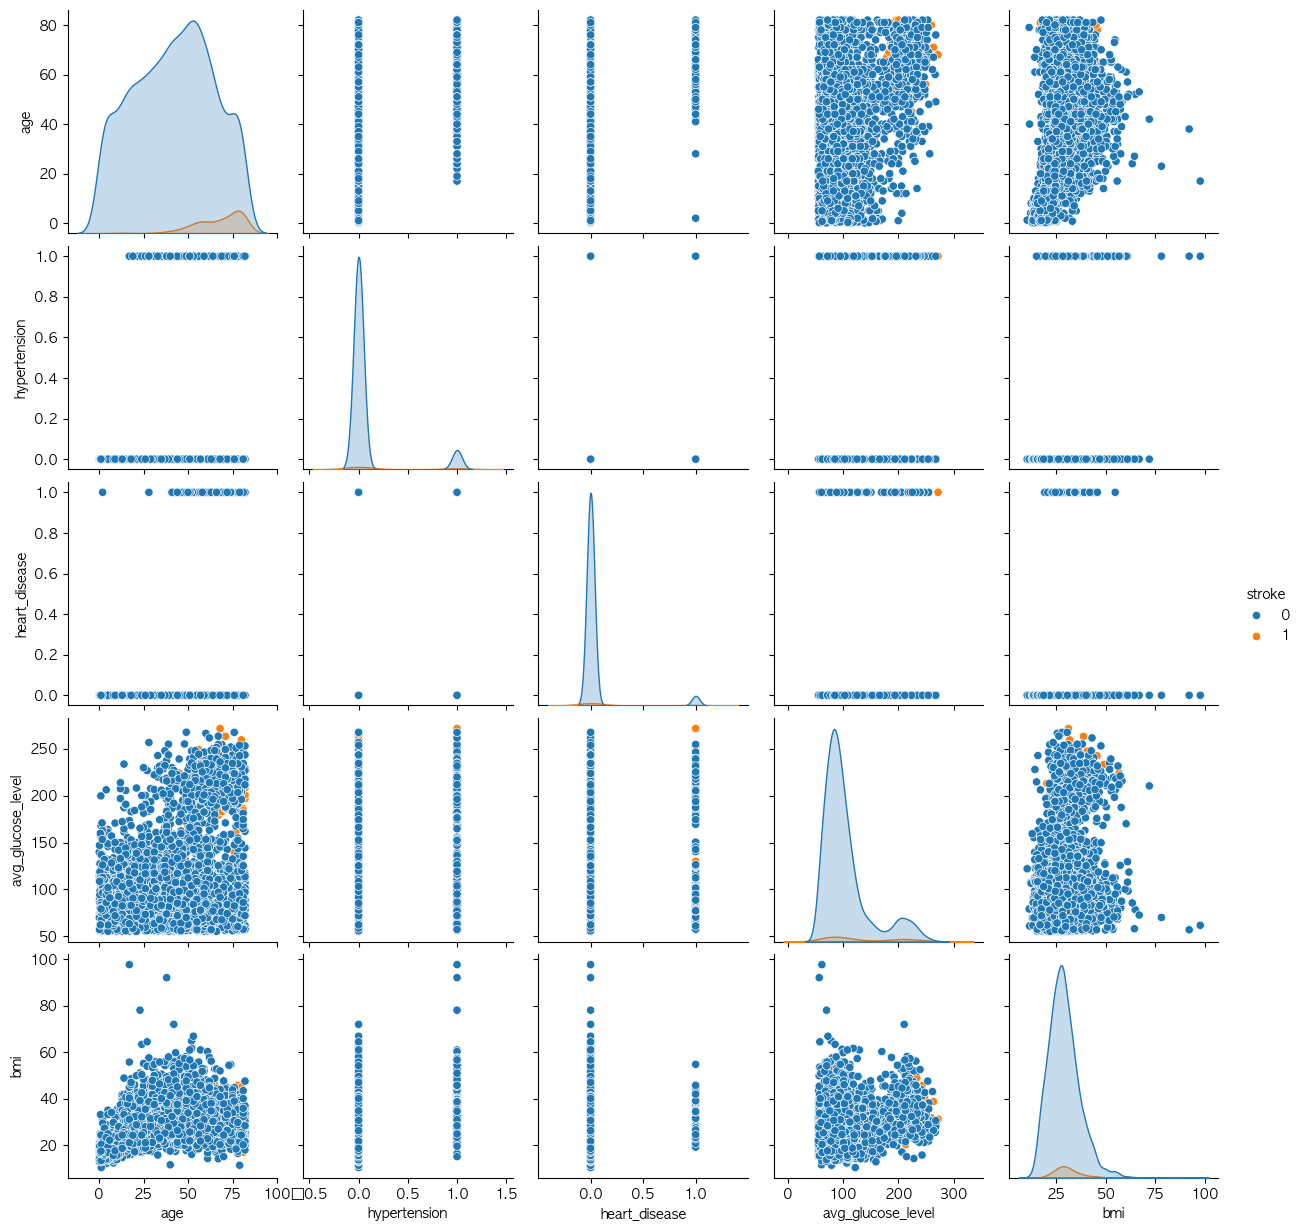

In [82]:
# 데이터프레임 생성
data_pd = pd.DataFrame(df)

# Pairplot 그리기
sns.pairplot(data_pd, hue='stroke')
plt.show()

### num to cate

In [84]:
get_dummies_df = pd.get_dummies(df)
get_dummies_df.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Female', 'gender_Male', 'gender_Other',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'age_bins_(-0.00192, 8.272]',
       'age_bins_(8.272, 16.464]', 'age_bins_(16.464, 24.656]',
       'age_bins_(24.656, 32.848]', 'age_bins_(32.848, 41.04]',
       'age_bins_(41.04, 49.232]', 'age_bins_(49.232, 57.424]',
       'age_bins_(57.424, 65.616]', 'age_bins_(65.616, 73.808]',
       'age_bins_(73.808, 82.0]', 'glucose_level_bins_0-50',
       'glucose_level_bins_51-100', 'glucose_level_bins_101-150',
       'glucose_level_bins_151-200', 'glucose_level_bins_201-250',
       'glucose_

In [85]:
'''# 데이터프레임 생성
get_dummies_df_pd = pd.DataFrame(get_dummies_df)

# Pairplot 그리기
sns.pairplot(get_dummies_df_pd, hue='stroke')
plt.show()'''

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/Users/sookyoungsohn/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
